### Data Collection

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [38]:
    url = 'https://time4u.kz/catalog/muzhskie_chasy_/'
url_ind = 'https://time4u.kz'

In [50]:
def getSoup(url):
    stream = urlopen(url)
    html_bytes = stream.read()
    html = html_bytes.decode("utf-8")
    soup = BeautifulSoup(html,features="html.parser")
    return soup

In [101]:
url_ind_list = []
def collectUrl():
    page_size = 60
    page_html = 'https://time4u.kz/catalog/muzhskie_chasy_/?PAGEN_1='
    for page in range(page_size):
        soup = getSoup(page_html+str(page))
        products = soup.find('div', attrs={'class':'products'})
        for product in products.findAll('div', attrs={'class':'product-item'}):
            link = product.div.div.a['href']
            url_ind_list.append(url_ind+link)
    print(len(url_ind_list))
collectUrl()

720


In [208]:
collect = []
header = ['Наименование','Price','Бренд','Гарантия','Тип браслета/ремешка','Тип механизма','Стекло',
          'Материал корпуса','Водозащита','Отображение времени','Будильник']
collect.append(header)
def collectIndInfo():
    for url_ind in url_ind_list:
        content = []
        soup = getSoup(url_ind)
        name = soup.find('div', {'id':'product-information'}).h1.span.text
        brand = ''
        guarantee = 0
        braceType = '' #'Полиуретан'
        mechanism = ''#'Кварцевый'
        glass = '' #'Минеральное'
        corp = '' # 'Пластик'
        waterproof = '' # 'WR30'
        timeFormat = '' # 'Электронные'
        alarm = False
        price = soup.find('h2', {'id':'price-preview'}).span.text
        price = price.replace(' ','')[:-3]
        price = price.replace('\r','')
        price = price.replace('\n','')
        props = soup.find('div', {'id':'props'})
        for prop in props.findAll('div',{'class':'prop-element'}):
            rowName = prop.findAll('div')[0].text
            rowValue = prop.findAll('div')[1].text
#             print(rowName.strip()+' : '+rowValue.strip())
            if(rowName.find('Бренд') > -1):
                brand = rowValue.strip()
            elif(rowName.find('Гарантия') > -1):
                guarantee = rowValue.strip()
            elif(rowName.find('Тип браслета/ремешка') > -1):
                braceType = rowValue.strip()
            elif(rowName.find('Стекло') > -1):
                glass = rowValue.strip()
            elif(rowName.find('Материал корпуса') > -1):
                corp = rowValue.strip()
            elif(rowName.find('Водозащита') > -1):
                waterproof = rowValue.strip()
            elif(rowName.find('Отображение времени') > -1):
                timeFormat = rowValue.strip()
            elif(rowName.find('Будильник') > -1):
                alarm = (rowValue.find('Есть') > -1)
            elif(rowName.find('Тип механизма') > -1):
                mechanism = rowValue.strip()
                
                    
        content.append(name)
        content.append(price)
        content.append(brand)
        content.append(guarantee)
        content.append(braceType)
        content.append(mechanism)
        content.append(glass)
        content.append(corp)
        content.append(waterproof)
        content.append(timeFormat)
        content.append(alarm)
        collect.append(content)
    print(len(collect)) 
    
collectIndInfo()
    

721


In [209]:
fw = open('result.csv', 'w')
for i in collect:
#     print(i)
    tmp = ''
    for j in i:
        tmp+=str(j)+str(',')
    tmp = tmp[:-1]+'\n'
    fw.write(tmp)
fw.close()

### Data Visualization

In [223]:
import matplotlib.pyplot as plt
import seaborn as sn

In [210]:
df = pd.read_csv('result.csv', delimiter = ",")
df

,Наименование,Price,Бренд,Гарантия,Тип браслета/ремешка,Тип механизма,Стекло,Материал корпуса,Водозащита,Отображение времени,Будильник
0,Daniel Klein KW37-4,20900,Daniel Klein,2 года,Полиуретан,NaN,Минеральное,Пластик,WR30,Электронные,True
1,Q&Q VR19J007Y,7600,NaN,2 года,NaN,Кварцевый,Пластиковое,Пластик,WR100,NaN,False
2,Q&Q A480J004Y,16900,Q&Q,2 года,NaN,Кварцевый,Минеральное,Нержавеющая сталь,WR30,NaN,False
3,Q&Q M190J003Y,10300,Q&Q,2 года,NaN,Электронные,Пластиковое,Пластик,WR100,NaN,True
4,Q&Q QZ82J001Y,18300,Q&Q,2 года,NaN,NaN,Минеральное,Нержавеющая сталь,WR50,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
715,Casio MTP-1141G-7BRDF,39681,NaN,1 год,Комбинированный браслет,Кварцевый,Минеральное,Нержавеющая сталь,WR30,Аналоговые,False
716,Casio F-105W-1ADF,23234,Casio,1 год,Каучуковый ремень,Кварцевый,NaN,Пластик,NaN,Аналоговые,False
717,Q&Q M124J002Y,21948,Q&Q,1 год,Пластиковые и резиновые ремни,Электронные,Пластиковое,Пластик,WR100,Электронные,True
718,Casio MTP-1129G-7ARDF,29300,NaN,2 года,Комбинированный браслет,Кварцевый,Минеральное,Нержавеющая сталь,WR30,Аналоговые,False


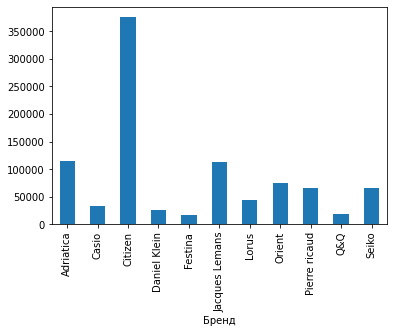

In [211]:
price = df.groupby('Бренд').mean()['Price']
price.plot(kind='bar');

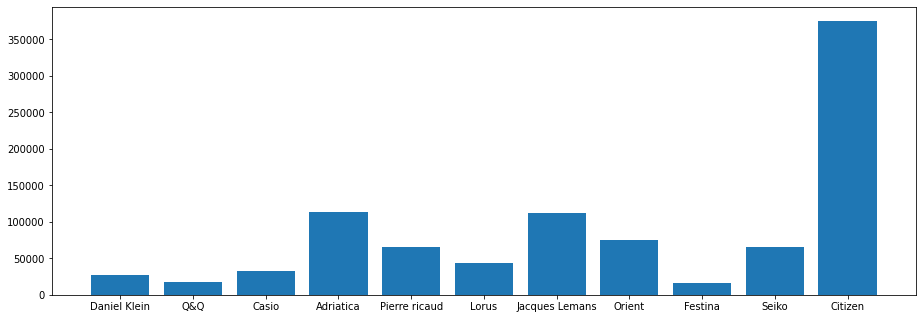

In [212]:
brendList = df['Бренд'].dropna().unique()
priceList = []
for name in brendList:
    priceList.append(price[name])
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(brendList,priceList)
plt.show()

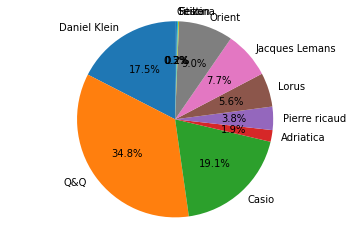

In [213]:
brend_counts = df['Бренд'].value_counts()
counts = []
for name in brendList:
    counts.append(brend_counts[name])
    
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=brendList, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
plt.show()

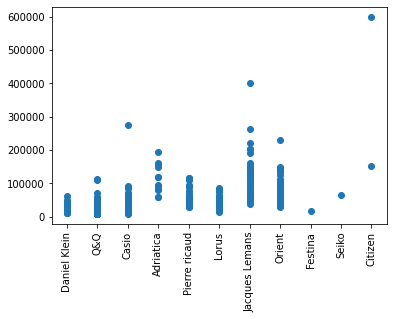

In [248]:
plt.scatter(df['Бренд'].values, df['Price'].values)
plt.xticks(rotation=90)
plt.show()

In [249]:
df.describe()

,Price
count,720.000000
mean,39542.858333
std,43388.543267
min,7100.000000
25%,16900.000000
50%,26895.000000
75%,44623.000000
max,600000.000000


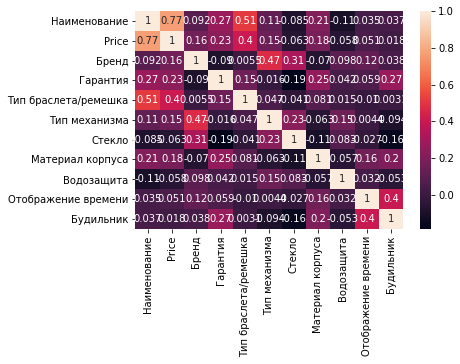

In [245]:
df_fill = df.fillna(df.mode().iloc[0])
df_fill = df_fill.apply(lambda x: x.factorize()[0])
corrMatrix = df_fill.corr()
corrMatrix
sn.heatmap(corrMatrix, annot=True)
plt.show()
# df_fill.isna().sum()

### Data Analytics

In [250]:
df_fill

,Наименование,Price,Бренд,Гарантия,Тип браслета/ремешка,Тип механизма,Стекло,Материал корпуса,Водозащита,Отображение времени,Будильник
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,0,1,1,1
2,2,2,1,0,1,0,0,1,0,1,1
3,3,3,1,0,1,1,1,0,1,1,0
4,4,4,1,0,1,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
715,703,467,1,3,5,0,0,1,0,1,1
716,704,219,2,3,4,0,0,0,0,1,1
717,705,211,1,3,2,1,1,0,1,0,0
718,706,168,1,0,5,0,0,1,0,1,1


Coefficients:  [ 0.51637209  3.80150385  0.30195691  1.73556038  0.17807422 -9.98318731
 -2.60950767  1.21476377 -5.94377147 52.50074729]
Variance score: 0.5735478071612974


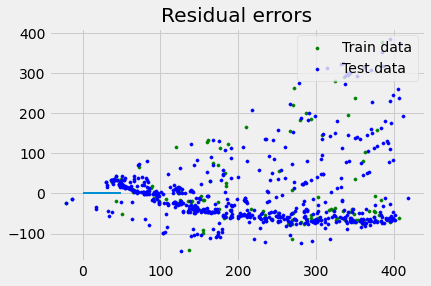

In [253]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
X = df_fill.loc[:, df_fill.columns != 'Price']
y = df_fill['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=1)
 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [278]:
X = df_fill.loc[:, df_fill.columns != 'Бренд']
y = df_fill['Бренд']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=len(df['Бренд'].dropna().unique()))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [280]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5243055555555556


In [295]:
X = df_fill['Price'].values.reshape(-1, 1)
y = df_fill['Бренд']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=len(df['Бренд'].dropna().unique()))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4791666666666667
